In [62]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
fprop = fm.FontProperties(fname=font_location)


train = pd.read_csv("data/train_data.csv",encoding="utf-8",index_col=False)
test = pd.read_csv("data/test_data.csv",index_col=False)

<AxesSubplot:>

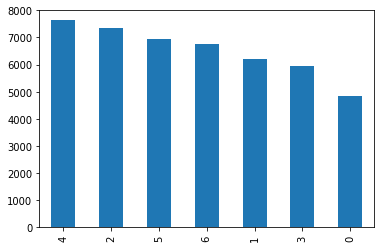

In [63]:
# datas with label
train["topic_idx"].value_counts().plot(kind="bar")


<AxesSubplot:>

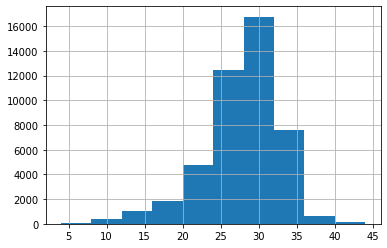

In [64]:
# string length
train["title"].str.len().hist()

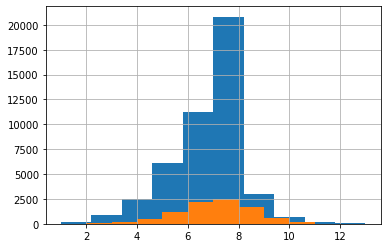

In [65]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

plot_word_number_histogram(train['title'])
plot_word_number_histogram(test['title'])

In [66]:
train.head()

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4


In [67]:
test.head()

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간


In [68]:
from konlpy.tag import Kkma  
kkma=Kkma()  
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']


In [69]:
from konlpy.tag import Mecab  
tokenizer = Mecab()
print(tokenizer.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '한', '당신', ',', '연휴', '에', '는', '여행', '을', '가', '봐요']


In [70]:
train["tokenized"] = [tokenizer.morphs(sentence) for sentence in train["title"]]

In [71]:
train.head()

,index,title,topic_idx,tokenized
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4,"[인천, →, 핀란드, 항공기, 결항, …, 휴가철, 여행객, 분통]"
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4,"[실리콘밸리, 넘어서, 겠, 다, …, 구글, 15, 조, 원, 들여, 美, 전역,..."
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4,"[이란, 외무, 긴장, 완화, 해결책, 은, 미국, 이, 경제, 전쟁, 멈추, 는, 것]"
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4,"[NYT, 클린턴, 측근, 韓, 기업, 특수, 관계, 조명, …, 공과, 사, 맞물..."
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4,"[시진핑, 트럼프, 에, 중미, 무역, 협상, 조속, 타결, 희망]"


No handles with labels found to put in legend.


('출시', '개발', '기술', 'LG', 'KT', 'AI', '종합', '갤럭시', '삼성', '네이버', '서비스', 'SKT', '으로', '스마트폰', '공개', '노트', '10', '연구', '게시판', '구글', '스마트', '과학', 'SK', '한국', '국내', '카카오', '모바일', '아이폰', '로봇', '데이터')
(517, 440, 415, 386, 358, 345, 329, 285, 262, 226, 219, 213, 195, 188, 183, 171, 170, 161, 156, 149, 147, 146, 138, 134, 133, 130, 128, 124, 122, 117)
('종합', '분기', '투자', '금융', '영업', '코스피', '작년', '증권', '시장', '특징', '은행', '출시', '상승', '대출', '기업', '실적', '금리', '증가', '주택', '주식', '10', '펀드', '달러', '한국', '게시판', '그래픽', '규모', '이익', '올해', '하락')
(654, 524, 521, 463, 437, 318, 305, 282, 245, 243, 240, 222, 219, 219, 218, 214, 213, 208, 206, 201, 187, 185, 184, 169, 165, 164, 162, 158, 156, 155)
('종합', '코로나', '19', '게시판', '지원', '한국', '기자', '으로', '노조', '방송', '교육', '학교', '언론', '교육청', 'KBS', '서울', '사장', '확진', '부산', '대표', '방통', '학생', '회장', '10', '뉴스', '해야', '조사', '지역', '광주', '사업')
(549, 367, 298, 291, 243, 239, 224, 197, 193, 190, 184, 171, 156, 155, 151, 149, 148, 144, 143, 137, 134, 134, 133, 131, 131, 128, 127, 

/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44592 missing f

/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44592 missing from curr

/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44048 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 46021 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/park/Workspace/dacon-new-classification/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 48176 missing from curr

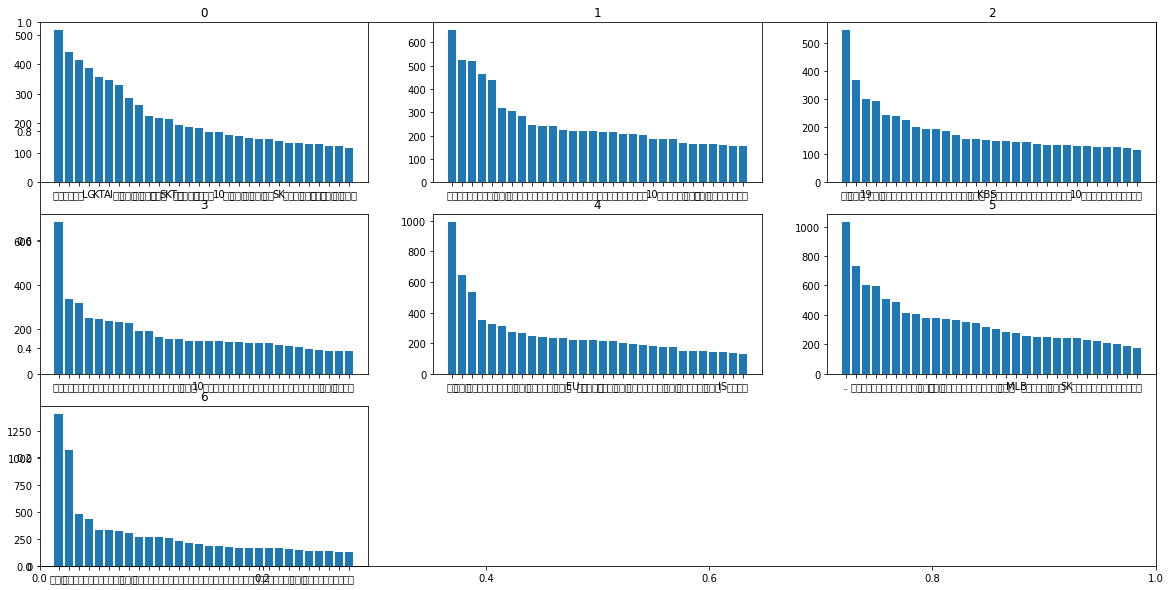

In [78]:
fig = plt.figure(figsize=(20,10)) # rows*cols 행렬의 i번째 subplot 생성
plt.legend(prop=fprop)
rows = 3
cols = 3
i = 1

from collections import defaultdict

def plot_top_stopwords_barchart2(tokenized_list):
    dic = defaultdict(int)
    for tokenized in tokenized_list:
        for tok in tokenized:
            if len(tok) == 1:
                continue
            dic[tok] += 1

    top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:30]

    x, y = zip(*top)
    return x, y

for i in range(7):
    x,y = plot_top_stopwords_barchart2(train[train['topic_idx']==i]['tokenized'])
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(i)
    ax.bar(x,y)
    print(x)
    print(y)

In [76]:
for i in range(7):
    x,y = plot_top_stopwords_barchart2(train[train['topic_idx']==i]['tokenized'])
    print(x)
    print(y)

('…', '·', '에', '5', '는', 'G', '출시', '개발', '기술', '로', '만', 'LG', 'KT', 'AI', '종합', '도', 'S', '1', '갤럭시', '서', '8', '2', '의', '다', '삼성', '은', '한', '폰', '하', '고')
(1955, 823, 710, 592, 567, 553, 517, 440, 415, 387, 386, 386, 358, 345, 329, 316, 301, 286, 285, 283, 282, 280, 277, 270, 262, 258, 248, 247, 237, 236)
('…', '에', '원', '억', '1', '·', '%', '2', '종합', '.', '3', '분기', '투자', '만', '금융', '영업', '5', '천', '주', '가', '4', '년', '로', '조', '코스피', '도', '작년', '은', '대', '한')
(2646, 1411, 1248, 878, 876, 837, 747, 733, 654, 615, 608, 524, 521, 507, 463, 437, 411, 399, 388, 348, 342, 324, 323, 322, 318, 313, 305, 292, 291, 288)
('…', '에', '·', '는', '명', '종합', '하', '의', '한', '1', '만', '로', '2', '코로나', '대', '도', '고', '은', '3', '일', '들', '서', '이', '년', '원', '19', '게시판', '다', '지원', '한국')
(2261, 1295, 1202, 766, 562, 549, 545, 431, 426, 410, 405, 398, 389, 367, 355, 353, 334, 331, 328, 326, 318, 310, 301, 300, 298, 298, 291, 247, 243, 239)
('…', '·', '의', '에', '는', '신간', '한', '도', '은', '일', '이', '고',

In [55]:
x,y

(('…', '에', '·', '는', '종합', '1', '2', '의', '원', '한'),
 (21352, 10435, 8174, 5012, 4717, 3960, 3885, 3883, 3372, 3323))